### Using the example data and code. Do the understanding. 

In [2]:
files_20 <- read.table("Example/eclipse-metrics-files-2.0.csv", header=T, sep=";")
files_21 <- read.table("Example/eclipse-metrics-files-2.1.csv", header=T, sep=";")

nrow(files_20)
nrow(files_21)

[1] 6729

[1] 7888

In [9]:
head(files_20)

plugin,filename,pre,post,ACD,FOUT_avg,FOUT_max,FOUT_sum,MLOC_avg,MLOC_max,...,NORM_ParameterizedType,NORM_QualifiedType,NORM_WildcardType,NORM_NormalAnnotation,NORM_MarkerAnnotation,NORM_SingleMemberAnnotation,NORM_MemberValuePair,NORM_AnnotationTypeDeclaration,NORM_AnnotationTypeMemberDeclaration,NORM_Modifier
org.eclipse.jdt.junit,/org.eclipse.jdt.junit/src/org/eclipse/jdt/internal/junit/launcher/JUnitBaseLaunchConfiguration.java,1,0,0,6.750000,29,54,9.250000,32,...,0,0,0,0,0,0,0,0,0,0.01978239
org.eclipse.jdt.junit,/org.eclipse.jdt.junit/src/org/eclipse/jdt/internal/junit/launcher/JUnitLaunchConfiguration.java,1,0,0,12.500000,13,25,16.000000,18,...,0,0,0,0,0,0,0,0,0,0.01372998
org.eclipse.jdt.junit,/org.eclipse.jdt.junit/src/org/eclipse/jdt/internal/junit/launcher/JUnitLaunchConfigurationTab.java,0,0,0,5.333333,10,16,12.666667,29,...,0,0,0,0,0,0,0,0,0,0.01046025
org.eclipse.jdt.junit,/org.eclipse.jdt.junit/src/org/eclipse/jdt/internal/junit/launcher/JUnitLaunchShortcut.java,2,0,0,7.333333,16,88,9.666667,28,...,0,0,0,0,0,0,0,0,0,0.01144366
org.eclipse.jdt.junit,/org.eclipse.jdt.junit/src/org/eclipse/jdt/internal/junit/launcher/JUnitMainTab.java,2,0,4,6.210526,27,118,9.894737,55,...,0,0,0,0,0,0,0,0,0,0.02002356
org.eclipse.jdt.junit,/org.eclipse.jdt.junit/src/org/eclipse/jdt/internal/junit/launcher/JUnitTabGroup.java,1,0,0,1.000000,1,2,5.000000,8,...,0,0,0,0,0,0,0,0,0,0.01595745


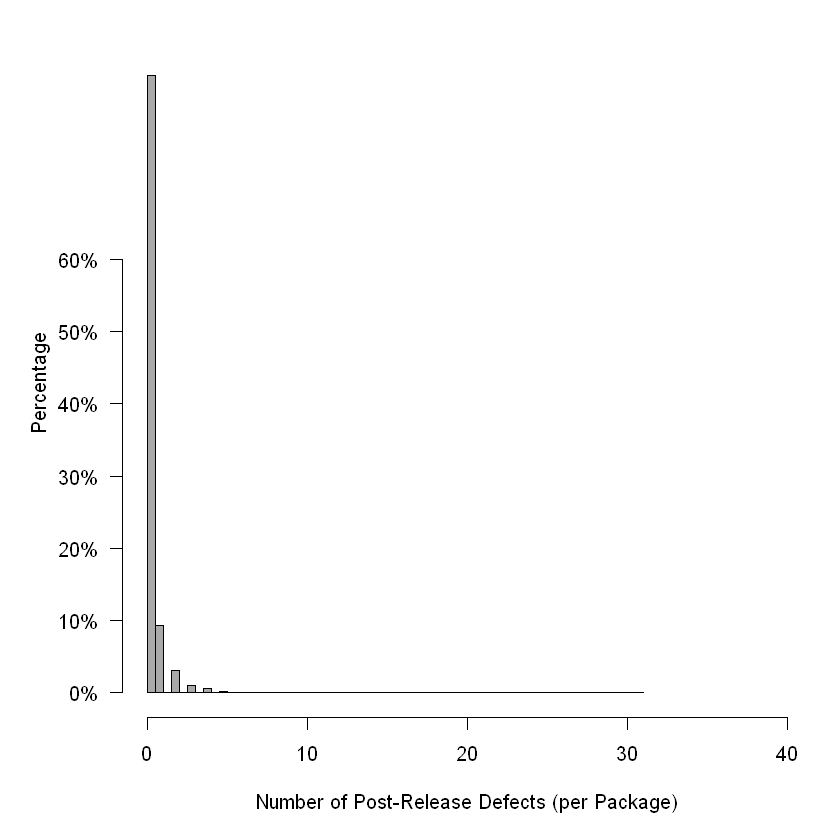

In [8]:
## set the parameter for drawing graphic. 
par(mar=c(5, 5, 2, 1) + 0.1)
## drawing the histogram
hist(files_20$post, freq=T, breaks=100, xlim=c(0,40), axes=F, main="", xlab="Number of Post-Release Defects (per Package)", ylab="Percentage", col="darkgray")
axis(1)

## this line, can draw the 0, 10%, 20% etc.. E.g., the 66.1 means the 661 (total number of lines) / 100 * 10. 
## the first param is: 2 means y axis. 1 means x. 
## 
axis(2, at=c(0, 673, 673*2, 673*3, 673*4, 673*5, 673*6), labels=c("0%","10%","20%","30%","40%","50%","60%"), las=1)

In [10]:
pre.p <- rep (-1, 33)
post.p <- rep (-1, 33)
## they chose 35 metrics from 100+ of them. 
## files_30[,i] means all of the rows,  ith columns (columns No.i). 
## cor.text() is used for do the correlation analysis. 
## The authors first test the correlation between each of the lines with labels. Then saved the p.value results into lists: pre.p and post.p
for (i in 3:35) {
    pre.p[i-2] <- cor.test(files_20[,i], files_20$pre, method="spearman", exact=FALSE)$p.value
    post.p[i-2] <- cor.test(files_20[,i], files_20$post, method="spearman", exact=FALSE)$p.value
}
## 
cbind(cor(files_20[,3:35], files_20$pre, method="spearman"), cor(files_20[,3:35], files_20$post, method="spearman"), (pre.p<0.01), (post.p<0.01))

pre,1.00000000,0.3338603,1,1
post,0.33386028,1.0000000,1,1
ACD,0.24854108,0.1380218,1,1
FOUT_avg,0.36029879,0.2797177,1,1
FOUT_max,0.39503888,0.3270244,1,1
FOUT_sum,0.39804328,0.3512398,1,1
MLOC_avg,0.31924991,0.2836856,1,1
MLOC_max,0.35681519,0.3221617,1,1
MLOC_sum,0.36970943,0.3498652,1,1
NBD_avg,0.31517912,0.2806697,1,1
NBD_max,0.35195976,0.3211889,1,1


In [6]:
test_classification <- function (train, test) 
{
    model.glm <- glm((post>0) ~ pre + ACD + FOUT_avg + FOUT_max + FOUT_sum + MLOC_avg + MLOC_max + MLOC_sum + NBD_avg + NBD_max + NBD_sum + NOF_avg + NOF_max + NOF_sum + NOI + NOM_avg + NOM_max + NOM_sum + NOT + NSF_avg + NSF_max + NSF_sum + NSM_avg + NSM_max + NSM_sum + PAR_avg + PAR_max + PAR_sum + + + TLOC + VG_avg + VG_max + VG_sum, data=train, family = "binomial")
    test.prob <- predict(model.glm, test, type="response")
    test.pred <- test.prob>=0.50

    outcome <- table(factor(test$post>0, levels=c(F,T)), factor(test.pred, levels=c(F,T)))
    TN <- outcome[1,1]
    FN <- outcome[2,1]
    FP <- outcome[1,2]
    TP <- outcome[2,2]
    precision <- if (TP + FP ==0) { 1 } else { TP / (TP + FP) }
    recall <- TP / (TP + FN)
    accuracy <- (TP + TN) / (TN + FN + FP + TP)
    defects <- (TP + FN) / (TN + FN + FP + TP)
    return (c(defects, precision, recall, accuracy))
}


test_classification(files_20, files_20)
test_classification(files_20, files_21)
test_classification(files_20, files_30)
test_classification(files_21, files_20)
test_classification(files_21, files_21)
test_classification(files_21, files_30)
test_classification(files_30, files_20)
test_classification(files_30, files_21)
test_classification(files_30, files_30)

[1] 0.1448952 0.6916890 0.2646154 0.8763561

[1] 0.1082657 0.4780059 0.1908665 0.8898327

[1] 0.1480223 0.6132723 0.1709184 0.8613235

[1] 0.1448952 0.6644295 0.2030769 0.8696686

[1] 0.1082657 0.6682927 0.1604215 0.9004817

[1] 0.1480223 0.7171053 0.1390306 0.8644388

[1] 0.1448952 0.5781585 0.2769231 0.8659533

[1] 0.1082657 0.5280899 0.2201405 0.8942698

[1] 0.1480223 0.6750000 0.2238520 0.8691589

In [7]:
test_classification_pkg <- function (train, test) 
{
    model.glm <- glm((post>0) ~ pre + ACD_avg + ACD_max + ACD_sum + FOUT_avg + FOUT_max + FOUT_sum + MLOC_avg + MLOC_max + MLOC_sum + NBD_avg + NBD_max + NBD_sum + NOCU + NOF_avg + NOF_max + NOF_sum + NOI_avg + NOI_max + NOI_sum + NOM_avg + NOM_max + NOM_sum + NOT_avg + NOT_max + NOT_sum + NSF_avg + NSF_max + NSF_sum + NSM_avg + NSM_max + NSM_sum + PAR_avg + PAR_max + PAR_sum + TLOC_avg + TLOC_max + TLOC_sum + VG_avg + VG_max + VG_sum, data=train, family = "binomial")
    test.prob <- predict(model.glm, test, type="response")
    test.pred <- test.prob>=0.50

    outcome <- table(factor(test$post>0, levels=c(F,T)), factor(test.pred, levels=c(F,T)))
    TN <- outcome[1,1]
    FN <- outcome[2,1]
    FP <- outcome[1,2]
    TP <- outcome[2,2]
    precision <- if (TP + FP ==0) { 1 } else { TP / (TP + FP) }
    recall <- TP / (TP + FN)
    accuracy <- (TP + TN) / (TN + FN + FP + TP)
    defects <- (TP + FN) / (TN + FN + FP + TP)
    return (c(defects, precision, recall, accuracy))
}


test_classification_pkg(packages_20, packages_20)
test_classification_pkg(packages_20, packages_21)
test_classification_pkg(packages_20, packages_30)
test_classification_pkg(packages_21, packages_20)
test_classification_pkg(packages_21, packages_21)
test_classification_pkg(packages_21, packages_30)
test_classification_pkg(packages_30, packages_20)
test_classification_pkg(packages_30, packages_21)
test_classification_pkg(packages_30, packages_30)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.5039788 0.8529412 0.7631579 0.8143236

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.4470046 0.7409639 0.6340206 0.7373272

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.4735250 0.7863248 0.5878594 0.7291982

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.5039788 0.8060606 0.7000000 0.7639257

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.4470046 0.8571429 0.7422680 0.8294931

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.4735250 0.8612245 0.6741214 0.7942511

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.5039788 0.7602041 0.7842105 0.7665782

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.4470046 0.7819149 0.7577320 0.7972350

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] 0.4735250 0.8916968 0.7891374 0.8547655

In [8]:
test_ranking <- function (train, test) 
{
    model.lm <- lm(post ~ pre + ACD + FOUT_avg + FOUT_max + FOUT_sum + MLOC_avg + MLOC_max + MLOC_sum + NBD_avg + NBD_max + NBD_sum + NOF_avg + NOF_max + NOF_sum + NOI + NOM_avg + NOM_max + NOM_sum + NOT + NSF_avg + NSF_max + NSF_sum + NSM_avg + NSM_max + NSM_sum + PAR_avg + PAR_max + PAR_sum + + + TLOC + VG_avg + VG_max + VG_sum, data=train)
    test.pred <- predict(model.lm, test)

    r.squared <- summary(model.lm)$r.squared
    pearson <- cor(test$post, test.pred, method="pearson")
    spearman <- cor(test$post, test.pred, method="spearman")
    pearson.p <- cor.test(test$post, test.pred, method="pearson")$p.value
    spearman.p <- cor.test(test$post, test.pred, method="spearman", exact=FALSE)$p.value

    return (c(r.squared, pearson, spearman, pearson.p<0.01, spearman.p<0.01))
}


test_ranking(files_20, files_20)
test_ranking(files_20, files_21)
test_ranking(files_20, files_30)
test_ranking(files_21, files_20)
test_ranking(files_21, files_21)
test_ranking(files_21, files_30)
test_ranking(files_30, files_20)
test_ranking(files_30, files_21)
test_ranking(files_30, files_30)

[1] 0.3240425 0.5692473 0.3982332 1.0000000 1.0000000

[1] 0.3240425 0.4297252 0.2857756 1.0000000 1.0000000

[1] 0.3240425 0.5443983 0.3400252 1.0000000 1.0000000

[1] 0.2390915 0.5170641 0.3766336 1.0000000 1.0000000

[1] 0.2390915 0.4889698 0.3113905 1.0000000 1.0000000

[1] 0.2390915 0.5619233 0.3587720 1.0000000 1.0000000

[1] 0.3736983 0.5177405 0.3832438 1.0000000 1.0000000

[1] 0.3736983 0.4335418 0.3053009 1.0000000 1.0000000

[1] 0.3736983 0.6113087 0.3617834 1.0000000 1.0000000

In [9]:

test_ranking_pkg <- function (train, test) 
{
    model.lm <- lm(post ~ pre + ACD_avg + ACD_max + ACD_sum + FOUT_avg + FOUT_max + FOUT_sum + MLOC_avg + MLOC_max + MLOC_sum + NBD_avg + NBD_max + NBD_sum + NOCU + NOF_avg + NOF_max + NOF_sum + NOI_avg + NOI_max + NOI_sum + NOM_avg + NOM_max + NOM_sum + NOT_avg + NOT_max + NOT_sum + NSF_avg + NSF_max + NSF_sum + NSM_avg + NSM_max + NSM_sum + PAR_avg + PAR_max + PAR_sum + TLOC_avg + TLOC_max + TLOC_sum + VG_avg + VG_max + VG_sum, data=train)
    test.pred <- predict(model.lm, test)

    r.squared <- summary(model.lm)$r.squared
    pearson <- cor(test$post, test.pred, method="pearson")
    spearman <- cor(test$post, test.pred, method="spearman")
    pearson.p <- cor.test(test$post, test.pred, method="pearson")$p.value
    spearman.p <- cor.test(test$post, test.pred, method="spearman", exact=FALSE)$p.value

    return (c(r.squared, pearson, spearman, pearson.p<0.01, spearman.p<0.01))
}


test_ranking_pkg(packages_20, packages_20)
test_ranking_pkg(packages_20, packages_21)
test_ranking_pkg(packages_20, packages_30)
test_ranking_pkg(packages_21, packages_20)
test_ranking_pkg(packages_21, packages_21)
test_ranking_pkg(packages_21, packages_30)
test_ranking_pkg(packages_30, packages_20)
test_ranking_pkg(packages_30, packages_21)
test_ranking_pkg(packages_30, packages_30)

[1] 0.7928892 0.8904433 0.6465423 1.0000000 1.0000000

[1] 0.7928892 0.8696546 0.4924224 1.0000000 1.0000000

[1] 0.7928892 0.7326264 0.5457407 1.0000000 1.0000000

[1] 0.8654567 0.8332209 0.6412497 1.0000000 1.0000000

[1] 0.8654567 0.9302992 0.7036070 1.0000000 1.0000000

[1] 0.8654567 0.7309284 0.7039308 1.0000000 1.0000000

[1] 0.7785919 0.7272669 0.6545441 1.0000000 1.0000000

[1] 0.7785919 0.7824509 0.5581952 1.0000000 1.0000000

[1] 0.7785919 0.8823786 0.6905800 1.0000000 1.0000000